In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import plotly.express as px
from pandas.plotting import parallel_coordinates

In [2]:
all_data = pd.read_csv('./data/fifa/all_players.csv')
all_data.drop(['Unnamed: 0', 'Height', 'Weight', 'Alternative positions', 'play style', 'url'], axis = 1, inplace= True)

all_data

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_75552/2329133090.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('./data/fifa/all_players.csv')


,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,Right,25,France,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Right,28,Spain,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Left,24,Norway,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,Right,21,England,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,Right,18,England,Barclays WSL,Spurs,NaN,NaN,NaN,NaN,NaN
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,Right,22,Spain,Liga F,Granada CF,NaN,NaN,NaN,NaN,NaN
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,Right,23,United States,Scottish Women's League,Glasgow City FC,NaN,NaN,NaN,NaN,NaN
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,NaN,NaN,NaN,NaN


In [3]:
cdm_stats = ['OVR', 'Interceptions', 'Standing Tackle', 'Def Awareness', 'Short Passing', 'Long Passing', 'Stamina', 'Strength' ,'Aggression', 'Composure', 'Reactions']
cdm_data = all_data[all_data['Position'] == 'CDM']
cdm_data = cdm_data.sort_values('OVR', ascending=False)[:15]
cdm_data.reset_index(inplace=True)
cdm_data.head()

,index,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,2,Rodri,91,66,80,86,84,87,85,...,Right,28,Spain,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
1,16171,31,Patri Guijarro,88,78,82,83,87,85,77,...,Right,26,Spain,Liga F,FC Barcelona,NaN,NaN,NaN,NaN,NaN
2,34,53,Declan Rice,87,73,72,82,79,84,85,...,Right,25,England,Premier League,Arsenal,NaN,NaN,NaN,NaN,NaN
3,16189,85,Lena Oberdorf,86,62,62,76,75,87,89,...,Right,22,Germany,GPFBL,FC Bayern München,NaN,NaN,NaN,NaN,NaN
4,47,70,Granit Xhaka,86,50,75,85,74,79,82,...,Left,31,Switzerland,Bundesliga,Leverkusen,NaN,NaN,NaN,NaN,NaN


In [4]:
fig = go.Figure()

for player in cdm_data['Name']:
    player_data = cdm_data[cdm_data['Name'] == player][cdm_stats].values.flatten()
    fig.add_trace(
        go.Bar(
            x=cdm_stats,
            y=player_data,
            name=player,
            visible=False
        )
    )

fig.data[0].visible = True


fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [i == j for i in range(len(cdm_data['Name']))]}],  
                    label=player,
                    method='update'
                )
                for j, player in enumerate(cdm_data['Name'])  
            ],
            direction='down',
            showactive=True,
        )
    ]
)

fig.update_layout(
    title='Best 30 CDM',
    xaxis_title='Attributes',
    yaxis_title='Value',
    showlegend=False
)

fig.show()

In [5]:
for stat in cdm_stats:
    print(f'Name: {cdm_data.Name[cdm_data[stat].idxmax()]}, index: {cdm_data[stat].idxmax()}, Stat:{stat}, value:{cdm_data[stat].iloc[cdm_data[stat].idxmax()]}')

Name: Rodri, index: 0, Stat:OVR, value:91
Name: N'Golo Kanté, index: 11, Stat:Interceptions, value:88
Name: Lena Oberdorf, index: 3, Stat:Standing Tackle, value:90
Name: Rodri, index: 0, Stat:Def Awareness, value:92
Name: Rodri, index: 0, Stat:Short Passing, value:93
Name: Patri Guijarro, index: 1, Stat:Long Passing, value:93
Name: Declan Rice, index: 2, Stat:Stamina, value:92
Name: Lena Oberdorf, index: 3, Stat:Strength, value:92
Name: Palhinha, index: 8, Stat:Aggression, value:95
Name: Rodri, index: 0, Stat:Composure, value:94
Name: Rodri, index: 0, Stat:Reactions, value:93


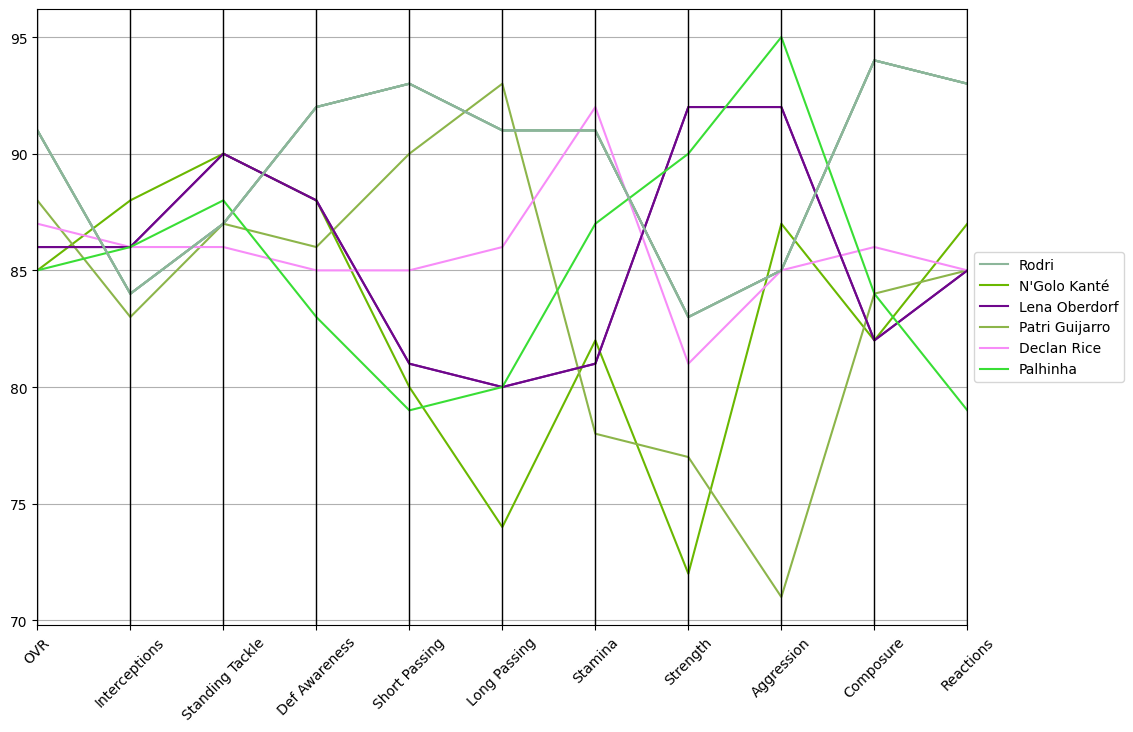

<Figure size 640x480 with 0 Axes>

In [6]:
cdm_best = cdm_data.loc[cdm_data[cdm_stats].idxmax()]

plt.figure(figsize=(12, 8))
parallel_coordinates(cdm_best, class_column='Name', cols=cdm_stats)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 45)
plt.show()
plt.savefig('save.png')

1) Rodri
2) Lena Oberdorf

CM

In [7]:
#CM
cm_stats = ['OVR', 'Short Passing','Vision','Ball Control','Stamina','Interceptions','Long Passing','Composure','Dribbling','Standing Tackle','Reactions']
cm_data = all_data[all_data['Position'] == 'CM']
cm_data = cm_data.sort_values('OVR', ascending=False)[:15]
cm_data.reset_index(inplace=True)
cm_data.head()

,index,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,16161,3,Aitana Bonmatí,91,81,86,86,91,77,75,...,Right,26,Spain,Liga F,FC Barcelona,NaN,NaN,NaN,NaN,NaN
1,5,9,Kevin De Bruyne,90,67,87,94,87,65,78,...,Right,33,Belgium,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN
2,16162,6,Alexia Putellas,90,82,89,90,91,72,78,...,Left,30,Spain,Liga F,FC Barcelona,NaN,NaN,NaN,NaN,NaN
3,7,12,Martin Ødegaard,89,70,82,89,89,67,66,...,Left,25,Norway,Premier League,Arsenal,NaN,NaN,NaN,NaN,NaN
4,22,34,Bernardo Silva,88,75,78,86,92,71,69,...,Left,30,Portugal,Premier League,Manchester City,NaN,NaN,NaN,NaN,NaN


In [8]:
fig = go.Figure()

for player in cm_data['Name']:
    player_data = cm_data[cm_data['Name'] == player][cm_stats].values.flatten()
    fig.add_trace(
        go.Bar(
            x=cm_stats,
            y=player_data,
            name=player,
            visible=False
        )
    )

fig.data[0].visible = True


fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [i == j for i in range(len(cm_data['Name']))]}],  
                    label=player,
                    method='update'
                )
                for j, player in enumerate(cm_data['Name'])  
            ],
            direction='down',
            showactive=True,
        )
    ]
)

fig.update_layout(
    title='Best 30 CM',
    xaxis_title='Attributes',
    yaxis_title='Value',
    showlegend=False
)

fig.show()

In [9]:
for stat in cm_stats:
    cm_data[stat] = pd.to_numeric(cm_data[stat], errors='coerce')
    print(f'Name: {cm_data.Name[cm_data[stat].idxmax()]}, index: {cm_data[stat].idxmax()}, Stat:{stat}, value:{cm_data[stat].iloc[cm_data[stat].idxmax()]}')

Name: Aitana Bonmatí, index: 0, Stat:OVR, value:91
Name: Kevin De Bruyne, index: 1, Stat:Short Passing, value:94
Name: Kevin De Bruyne, index: 1, Stat:Vision, value:95
Name: Kevin De Bruyne, index: 1, Stat:Ball Control, value:92
Name: Bernardo Silva, index: 4, Stat:Stamina, value:93
Name: Aitana Bonmatí, index: 0, Stat:Interceptions, value:88
Name: Kevin De Bruyne, index: 1, Stat:Long Passing, value:93
Name: Alexia Putellas, index: 2, Stat:Composure, value:92
Name: Bernardo Silva, index: 4, Stat:Dribbling, value:93
Name: Grace Geyoro, index: 9, Stat:Standing Tackle, value:90
Name: Kevin De Bruyne, index: 1, Stat:Reactions, value:92


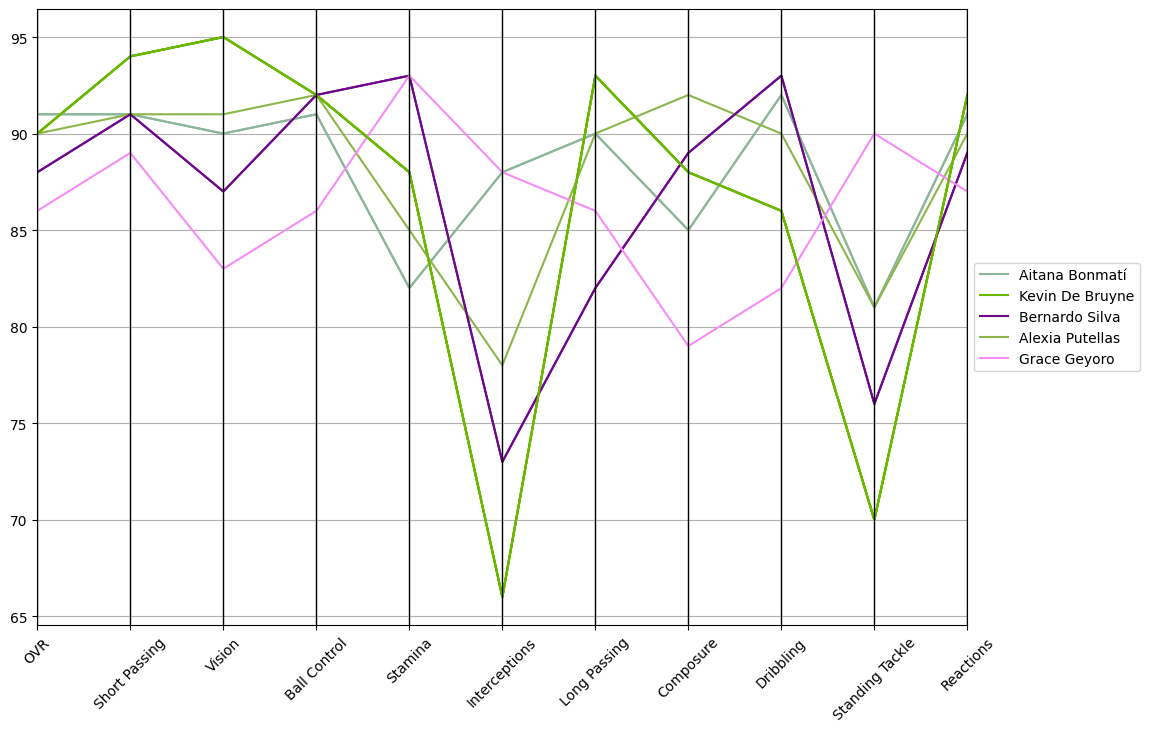

In [10]:
cm_best = cm_data.loc[cm_data[cm_stats].idxmax()]

plt.figure(figsize=(12, 8))
parallel_coordinates(cm_best, class_column='Name', cols=cm_stats)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 45)
plt.show()

1) Kevin De Bruyne
2)Aitana Bonmati / Bernardo Silva

In [11]:
#CAM
cam_data = all_data[all_data['Position'] == 'CAM']
cam_data = cam_data.reset_index()
cam_data = cam_data.sort_values('OVR', ascending=False)[:15]
cam_data.head()

,index,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Preferred foot,Age,Nation,League,Team,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,3,5,Jude Bellingham,90,80,87,83,88,78,83,...,Right,21,England,LALIGA EA SPORTS,Real Madrid,NaN,NaN,NaN,NaN,NaN
1,25,42,Florian Wirtz,88,81,78,87,89,50,67,...,Right,21,Germany,Bundesliga,Leverkusen,NaN,NaN,NaN,NaN,NaN
961,16169,26,Debinha,88,84,81,87,91,46,68,...,Right,32,Brazil,NWSL,KC Current,NaN,NaN,NaN,NaN,NaN
4,37,57,Bruno Fernandes,87,70,85,88,83,65,75,...,Right,30,Portugal,Premier League,Man Utd,NaN,NaN,NaN,NaN,NaN
962,16180,58,Rose Lavelle,87,86,79,84,87,45,63,...,Left,29,United States,NWSL,NJ/NY Gotham,NaN,NaN,NaN,NaN,NaN


In [12]:
cam_stats = ["Vision","Short Passing","Dribbling","Ball Control","Finishing","Positioning","Agility","Composure","Stamina"]

fig = go.Figure()

for player in cam_data['Name']:
    player_data = cam_data[cam_data['Name'] == player][cam_stats].values.flatten()
    fig.add_trace(
        go.Bar(
            x=cam_stats,
            y=player_data,
            name=player,
            visible=False
        )
    )

fig.data[0].visible = True


fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [i == j for i in range(len(cam_data['Name']))]}],  
                    label=player,
                    method='update'
                )
                for j, player in enumerate(cam_data['Name'])  
            ],
            direction='down',
            showactive=True,
        )
    ]
)

fig.update_layout(
    title='Best 30 CAM',
    xaxis_title='Attributes',
    yaxis_title='Value',
    showlegend=False
)

fig.show()

In [13]:
for stat in cam_stats:
    cam_data[stat] = pd.to_numeric(cam_data[stat], errors='coerce')
    print(f'Name: {cm_data.Name[cm_data[stat].idxmax()]}, index: {cm_data[stat].idxmax()}, Stat:{stat}, value:{cm_data[stat].iloc[cm_data[stat].idxmax()]}')

Name: Kevin De Bruyne, index: 1, Stat:Vision, value:95
Name: Kevin De Bruyne, index: 1, Stat:Short Passing, value:94
Name: Bernardo Silva, index: 4, Stat:Dribbling, value:93
Name: Kevin De Bruyne, index: 1, Stat:Ball Control, value:92
Name: Aitana Bonmatí, index: 0, Stat:Finishing, value:91
Name: Aitana Bonmatí, index: 0, Stat:Positioning, value:91
Name: Bernardo Silva, index: 4, Stat:Agility, value:95
Name: Alexia Putellas, index: 2, Stat:Composure, value:92
Name: Bernardo Silva, index: 4, Stat:Stamina, value:93


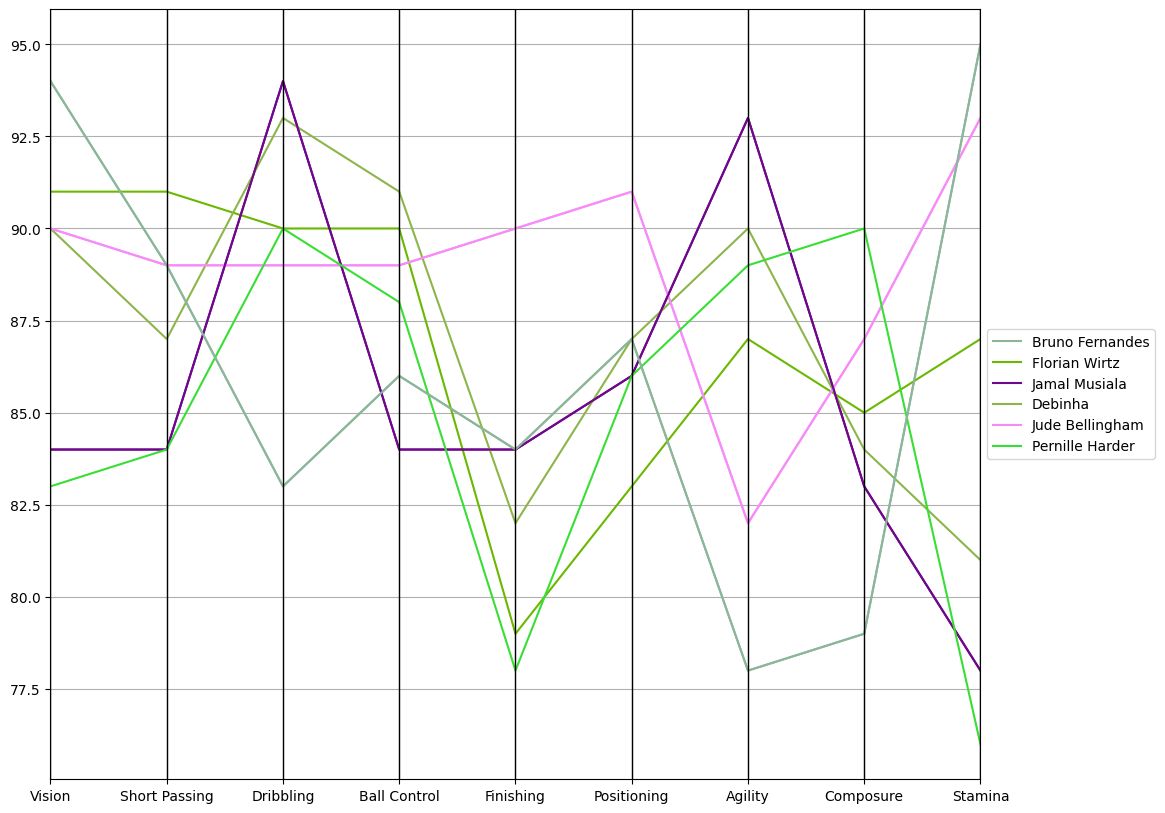

In [14]:
cam_best = cam_data.loc[cam_data[cam_stats].idxmax()]

plt.figure(figsize=(12,10))
parallel_coordinates(cam_best, class_column='Name', cols=cam_stats)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.show()

1)Jude Bellingham
2) Bruno Fernandex/Jamal Musiala